In [1]:
!pip install tika
!pip install PyPDF2
!pip install pytextrank
!pip install spacy && python -m spacy download en_core_web_sm

  Created wheel for tika: filename=tika-1.24-cp37-none-any.whl size=32885 sha256=95e9b395ba507cf0b4c050b61d699d13b22bbff82289062b6980645aaee7a8c3
  Stored in directory: /root/.cache/pip/wheels/73/9c/f5/0b1b738442fc2a2862bef95b908b374f8e80215550fb2a8975
Successfully built tika
     |████████████████████████████████| 81kB 3.1MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61085 sha256=e971779bc91b78beb68cd90c2eb3f2ff7cce8c18d23ecb94558491f246b5e6d8
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2
     |████████████████████████████████| 12.7MB 281kB/s 
     |████████████████████████████████| 460kB 45.9MB/s 
     |████████████████████████████████| 1.1MB 45.6MB/s 
     |████████████████████████████████| 9.1MB 46.4MB/s 
     |████████████████████████████████| 122kB 44.7MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=c118977ab

In [2]:
import pandas as pd 
from glob import glob
from tika import parser # pip install tika
import re
import string
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
import pytextrank
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.summarization import keywords, mz_keywords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from google.colab import drive
drive.mount('/content/gdrive/')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Mounted at /content/gdrive/


In [ ]:
files = glob(f"/content/gdrive/My Drive/Test/*.pdf")
#print(files)
for file1 in files:
  #print(file1)
  raw = parser.from_file(file1)
  print(raw['content'])














































 

Journal Pre-proof

COVID-19 and global mental health

Professor Klaus W. Lange M.D.Ph.D.

PII: S2414-6447(21)00004-X
DOI: https://doi.org/10.1016/j.glohj.2021.02.004
Reference: GLOHJ 50

To appear in: Global Health Journal

Received date: 14 July 2020
Revised date: 5 November 2020
Accepted date: 1 February 2021

Please cite this article as: Professor Klaus W. Lange M.D.Ph.D. , COVID-19 and global mental health,
Global Health Journal (2021), doi: https://doi.org/10.1016/j.glohj.2021.02.004

This is a PDF file of an article that has undergone enhancements after acceptance, such as the addition
of a cover page and metadata, and formatting for readability, but it is not yet the definitive version of
record. This version will undergo additional copyediting, typesetting and review before it is published
in its final form, but we are providing this version to give early visibility of the article. Please note that,
during the production process, 

In [ ]:
def remove_URL(text):
    url_pattern = re.compile(r'https?://\S+')
    return url_pattern.sub(r'', text)

In [ ]:
punct =[]
punct += list(string.punctuation)
punct += '’'
punct.remove("'")
def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text

In [ ]:
stop_words= stopwords.words('english')
# Add all the required words to the stop-words corpus
stop_words.extend(['from', 'mr', 'said','subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done',
  'try', 'many', 'applause', 'u','000', 'one', 'year', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'l ','2',
  'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', 'title','abstract','preprint','biorxiv','al','et.',
  'author','copyright','holder','https','license','et','al.','may','also','medrxiv','granted','reuse','rights','used','reserved','peer','holder','figure','fig','table','http','j'])
# Remove stop-words
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [ ]:
tx=remove_stopwords(raw['content'])
print(tx)

Journal Pre-proof COVID-19 global mental health Professor Klaus W. Lange M.D.Ph.D. PII: S2414-6447(21)00004-X DOI: https://doi.org/10.1016/j.glohj.2021.02.004 Reference: GLOHJ 50 To appear in: Global Health Journal Received date: 14 July 2020 Revised date: 5 November 2020 Accepted date: 1 February 2021 Please cite article as: Professor Klaus W. Lange M.D.Ph.D. , COVID-19 global mental health, Global Health Journal (2021), doi: https://doi.org/10.1016/j.glohj.2021.02.004 This PDF file article undergone enhancements acceptance, addition cover page metadata, formatting readability, yet definitive version record. This version undergo additional copyediting, typesetting review published final form, providing version give early visibility article. Please note that, production process, errors discovered affect content, legal disclaimers apply journal pertain. © 2021 People’s Medical Publishing House Co. Ltd. Publishing service Elsevier B.V. behalf KeAi. This open access article CC BY-NC-ND (h

In [ ]:
text='HeKWEBFJWBM KJNDLKCNKJS \n'
text=text.replace('\n', ' ')
print(text)

HeKWEBFJWBM KJNDLKCNKJS  


In [ ]:
def clean_text(text):
    print('Converting to lower case...')
    text=text.lower()
    print('Removing /n characters...')
    text=text.replace('\n', ' ')
    print('Removing urls...')
    text=remove_URL(text)
    print("Removing non Alpha-Numeric Characters")
    text=re.sub('[^A-Za-z0-9]+',' ',text)
    print('Removing punctuations...')
    text= remove_punctuations(text)
    print('Removing the stopwords...')
    text=remove_stopwords(text)
    return text
original_text=raw['content']

cleaned_text=clean_text(original_text)

Converting to lower case...
Removing /n characters...
Removing urls...
Removing non Alpha-Numeric Characters
Removing punctuations...
Removing the stopwords...


In [ ]:
tokenized_text=word_tokenize(cleaned_text)

In [ ]:
# Lemmatize the filtered-sentences
from nltk.stem import WordNetLemmatizer

lemmatizer= WordNetLemmatizer()
lemmentized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
#lemm_speech_president_2 = [lemmatizer.lemmatize(word) for word in filtered_speech_president_2]
#lemm_speech

## Frequency Distribution and Keywords

In [ ]:
from nltk.probability import FreqDist
for i in range(lemmentized_text.count('l')):
  lemmentized_text.remove('l')
freqdist_1 = FreqDist(lemmentized_text)

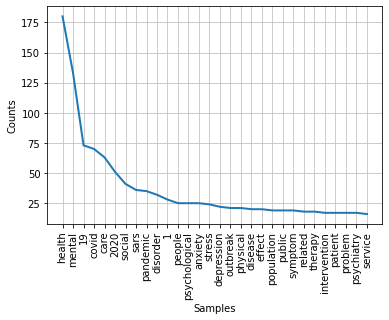

In [ ]:
# Here we are plotting the top 30 most recurring words in the document for the president
freqdist_1.plot(30,cumulative=False)

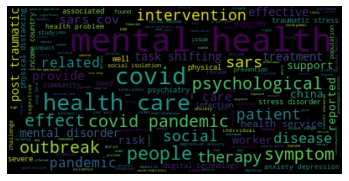

In [ ]:

# wordcloud = WordCloud().generate(cleaned)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(' '.join(lemmentized_text))
#print("Word-cloud for the president :",president_1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("textrank", last=True)
doc = nlp(cleaned_text)
#print("Key-phrases based on rank for the president :",president_1)
for p in doc._.phrases:
    print("{:.4f} {:5d}  {}".format(p.rank, p.count, p.text))
    #print(p.chunks)

0.1206     2  mental health care
0.1201     1  mental health
0.1188     2  mental disorders mental health issues
0.1158     1  mental health disorders
0.1152     1  increased mental health burden poor mental health outcomes
0.1134     2  mental health effects
0.1130     2  mental health services
0.1130     1  pandemic mental health date epidemiological data mental health problems
0.1129     1  mental health coronavirus
0.1129     3  mental health problems
0.1128     1  access mental health care
0.1118     1  mental health issues
0.1116     1  mental health challenges
0.1111     1  poor mental health
0.1110     1  mental health practitioners
0.1105     1  mental health disparities
0.1084     1  health care workers general population public mental health interventions
0.1074     1  mental health status people
0.1072     1  mental health services patients
0.1062     1  selective primary health care public health
0.1061     1  risk mental health problems
0.1060     1  public mental health 

In [ ]:
def get_keywords(text):
  return(keywords(text))
print(get_keywords(cleaned_text))

covid
global mental health
caring
providers
provided
provides
effects
effectively
effectiveness
psychiatry
pandemic
disorders
disord
psychology
access
accessible
accessed
social support
anxiety
socially isolated
symptom
med
form providing
outbreaks
outbreak
intervention
diseases
supportive patient
depressed
depression
depress
increasing
increases
needs
care workers general public timely preventive
therapy
therapies
supporting
related
relating
reported
reporting
reports
cause psychological
work
worked
working
affect
affecting
affective
affected
community
communities
communication
traumatic stress disorder
coronavirus disease
prevent
prevention treatment
presented increased
people medical publishing
sars cov
problems
problem
treatments
previous pandemics present
service
services
association
clinical symptoms
lancet
task shifting digital technologies provide cost effective means
population
populations
associated psychiatric
infect
infections
jama
psychiatr
presentations
presentation
china

Montemurro and Zanette algorithm


The algorithm identifies words that are significant to the structure of the document - these often correspond to the major themes. It does so independently of a corpus.


We used the mz_keywords module from the gensim library that extracts weighted keywords based on the MZ algorithm.

In [ ]:
#Getting the weighted Keywords.
def get_weighted_keywords(text):
  return(mz_keywords(' '.join(text), scores=True,weighted=False,threshold=1.0))
get_weighted_keywords(lemmentized_text)

/usr/local/lib/python3.7/dist-packages/gensim/summarization/mz_entropy.py:70: RuntimeWarning: divide by zero encountered in log2
  log_p = numpy.log2(p)
/usr/local/lib/python3.7/dist-packages/gensim/summarization/mz_entropy.py:71: RuntimeWarning: invalid value encountered in multiply
  h = numpy.nan_to_num(p * log_p).sum(axis=0)


[('june', 2.0809244551415955),
 ('kw', 1.9275354925612675),
 ('resource', 1.9275354925612675),
 ('article', 1.8069685549970949),
 ('information', 1.8069685549970949),
 ('accessed', 1.7027593639385818),
 ('traumatic', 1.6791412689491163),
 ('galea', 1.6336879212123503),
 ('journal', 1.6336879212123503),
 ('liu', 1.6336879212123503),
 ('mers', 1.6336879212123503),
 ('mov', 1.6336879212123503),
 ('nutr', 1.6336879212123503),
 ('showed', 1.6336879212123503),
 ('older', 1.6329529257453657),
 ('post', 1.6329529257453657),
 ('approach', 1.537360011941999),
 ('acute', 1.4498268626405009),
 ('website', 1.4234593990139732),
 ('accessible', 1.3689562789003578),
 ('affect', 1.3689562789003578),
 ('basic', 1.3689562789003578),
 ('consultation', 1.3689562789003578),
 ('fatigue', 1.3689562789003578),
 ('gen', 1.3689562789003578),
 ('geriatr', 1.3689562789003578),
 ('ipsos', 1.3689562789003578),
 ('neurol', 1.3689562789003578),
 ('observed', 1.3689562789003578),
 ('ph', 1.3689562789003578),
 ('profess

In [ ]:
def get_NMF_topics(text):
  vectorizer = TfidfVectorizer(max_features=50, min_df=1, stop_words='english')
  X = vectorizer.fit_transform(text)
  idx_to_word = np.array(vectorizer.get_feature_names())
  # apply NMF
  nmf = NMF(n_components=20, solver="mu")
  W = nmf.fit_transform(X)
  H = nmf.components_

  for i, topic in enumerate(H):
      print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in idx_to_word [topic.argsort()[-10:]]])))
get_NMF_topics(lemmentized_text)

Topic 1: technology,patient,effect,depression,therapy,psychiatry,population,intervention,related,health
Topic 2: income,traumatic,lange,outbreak,therapy,population,people,related,problem,mental
Topic 3: isolation,provide,coronavirus,anxiety,older,service,patient,people,2020,19
Topic 4: disorder,anxiety,stress,technology,population,social,intervention,related,19,covid
Topic 5: anxiety,people,stress,psychiatry,social,population,intervention,related,covid,care
Topic 6: global,technology,social,population,intervention,psychiatry,covid,care,related,2020
Topic 7: digital,review,disorder,worker,lancet,coronavirus,isolation,therapy,patient,social
Topic 8: 19,covid,digital,traumatic,technology,service,patient,intervention,related,sars
Topic 9: traumatic,income,isolation,population,sars,patient,service,therapy,related,pandemic
Topic 10: isolation,global,2019,technology,psychiatry,patient,therapy,intervention,related,disorder
Topic 11: coronavirus,digital,distress,task,2019,lancet,lange,problem,p

# References:


1.   https://github.com/harshita219/Covid19-research-NLP/blob/master/nlp_main.ipynb -- Cleaning 

